<a href="https://colab.research.google.com/github/Only-Mike/ADHD/blob/main/ADHD_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
!git clone 'https://github.com/Only-Mike/ADHD.git'

fatal: destination path 'ADHD' already exists and is not an empty directory.


In [4]:
df = pd.read_csv('/content/ADHD/datasets/KKI_phenotypic.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ScanDir ID       83 non-null     int64  
 1   Site             83 non-null     int64  
 2   Gender           83 non-null     int64  
 3   Age              83 non-null     float64
 4   Handedness       83 non-null     int64  
 5   DX               83 non-null     int64  
 6   Secondary Dx     15 non-null     object 
 7   ADHD Measure     83 non-null     int64  
 8   ADHD Index       83 non-null     int64  
 9   Inattentive      83 non-null     int64  
 10  Hyper/Impulsive  83 non-null     int64  
 11  IQ Measure       83 non-null     int64  
 12  Verbal IQ        83 non-null     int64  
 13  Performance IQ   83 non-null     int64  
 14  Full2 IQ         0 non-null      float64
 15  Full4 IQ         83 non-null     int64  
 16  Med Status       83 non-null     int64  
 17  QC_Rest_1        8

In [6]:
#dropping unrelevant columns
df = df.drop(columns = ['Site', 'ADHD Measure', 'IQ Measure', 'Full2 IQ', 'QC_Rest_1', 'QC_Rest_2', 'QC_Rest_3', 'QC_Rest_4', 'QC_Anatomical_1', 'QC_Anatomical_2', 'DX'])

In [23]:
df.describe() #We have some false values in the following columns: ADHD Index, Inattentive and Hyper/Impulsive

,ScanDir ID,Gender,Age,Handedness,Secondary Dx,ADHD Index,Inattentive,Hyper/Impulsive,Verbal IQ,Performance IQ,Full4 IQ,Med Status
count,2.080000e+03,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000,2080.000000
mean,3.859503e+06,0.550962,10.222115,0.944712,0.259615,55.314423,55.550962,55.809615,113.589423,108.670673,110.317308,1.249519
std,1.724259e+06,0.497516,1.440729,0.338802,0.438529,11.321961,11.408557,10.800446,14.429797,12.109835,11.792591,0.432839
min,1.018959e+06,0.000000,8.000000,0.000000,0.000000,40.000000,40.000000,41.000000,81.000000,79.000000,85.000000,1.000000
25%,2.533564e+06,0.000000,9.000000,1.000000,0.000000,46.000000,46.000000,47.000000,103.000000,100.000000,101.000000,1.000000
50%,3.666244e+06,1.000000,10.000000,1.000000,0.000000,53.000000,53.000000,54.000000,113.000000,109.000000,111.000000,1.000000
75%,4.991056e+06,1.000000,11.000000,1.000000,1.000000,62.250000,63.000000,63.000000,124.000000,118.000000,120.000000,1.000000
max,9.922944e+06,1.000000,13.000000,2.000000,1.000000,90.000000,90.000000,90.000000,146.000000,137.000000,134.000000,2.000000


In [8]:
#Round age for fewer unique values and making into integer
df['Age'] = df['Age'].round(decimals = 0)
df['Age'] = df['Age'].astype(int)

In [9]:
#Removes rows with -999 in the following columns
df = df[df['Inattentive'] != -999]
df = df[df['Hyper/Impulsive'] != -999]
df = df[df['ADHD Index'] != -999]

In [10]:
#But as we can see with the min function, it removed the false values of -999
df.min()

<ipython-input-10-86b8d0be8a1f>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.min()


ScanDir ID         1018959
Gender                   0
Age                      8
Handedness               0
ADHD Index              40
Inattentive             40
Hyper/Impulsive         41
Verbal IQ               81
Performance IQ          79
Full4 IQ                85
Med Status               1
dtype: int64

In [11]:
df['Secondary Dx '].unique()

array([nan, 'Simple phobia', 'Simple Phobia', 'simple phobias', 'ODD',
       'Simple Phobia ', 'ODD; Phobia', 'Specific phobia', 'Phobia',
       'social and simple phobia '], dtype=object)

In [12]:
#Making none secondary dx into 0 and any secondary dx into 1
df['Secondary Dx '].replace(('Simple phobia', 'Simple Phobia', 'simple phobias', 'ODD', 'Simple Phobia ', 'ODD; Phobia', 'Specific phobia', 'Phobia', 'social and simple phobia '), (1, 1, 1, 1, 1, 1, 1, 1, 1), inplace=True)
df['Secondary Dx '] = df['Secondary Dx '].fillna(0).astype(int)

In [13]:
#Checking that it worked as intended
df['Secondary Dx '].unique()

array([0, 1])

In [14]:
pip install sdv -q

In [15]:
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(df)

In [16]:
#Creating the synthetic data
synthetic_data = model.sample(2000)
synthetic_data.head()

,ScanDir ID,Gender,Age,Handedness,Secondary Dx,ADHD Index,Inattentive,Hyper/Impulsive,Verbal IQ,Performance IQ,Full4 IQ,Med Status
0,2533591,1,8,1,0,56,57,55,112,109,121,2
1,4823036,0,8,0,0,66,73,51,102,118,108,1
2,6512222,0,9,1,0,70,67,62,118,97,108,1
3,4297671,1,8,1,0,54,53,50,136,108,105,1
4,3423682,1,9,0,1,59,59,54,128,109,111,1


In [17]:
#Checking the number of unique values in each column to see if something seems odd
synthetic_data.nunique()

ScanDir ID         2000
Gender                2
Age                   6
Handedness            3
Secondary Dx          2
ADHD Index           51
Inattentive          51
Hyper/Impulsive      50
Verbal IQ            66
Performance IQ       59
Full4 IQ             50
Med Status            2
dtype: int64

In [18]:
#Appending the synthetic data to the original df
df = df.append([synthetic_data])

In [19]:
#There is now 2080 rows each with a unique id
df.nunique()

ScanDir ID         2080
Gender                2
Age                   6
Handedness            3
Secondary Dx          2
ADHD Index           51
Inattentive          51
Hyper/Impulsive      50
Verbal IQ            66
Performance IQ       59
Full4 IQ             50
Med Status            2
dtype: int64

# ADHD Index vs Inattentive vs Hyper/Impulsive

In [20]:
corr_matrix = df.corr()
corr_matrix['ADHD Index'].sort_values(ascending = False)

ADHD Index         1.000000
Inattentive        0.849850
Hyper/Impulsive    0.707895
Secondary Dx       0.234465
Age                0.086863
Med Status         0.072418
Handedness         0.000145
ScanDir ID        -0.055107
Verbal IQ         -0.082851
Performance IQ    -0.098825
Gender            -0.160907
Full4 IQ          -0.217692
Name: ADHD Index, dtype: float64

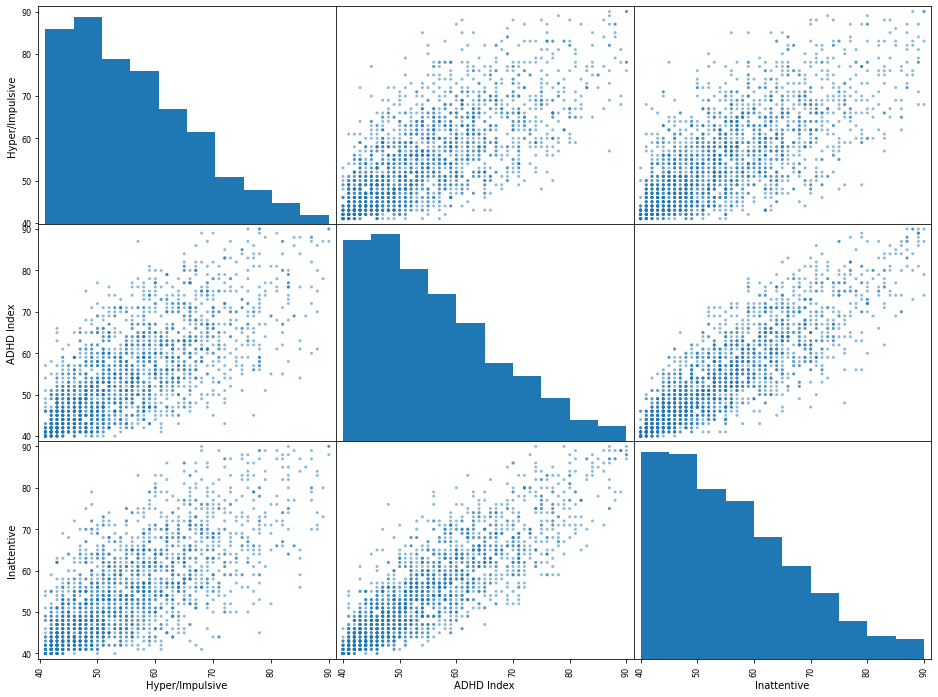

In [22]:
from pandas.plotting import scatter_matrix

attributes = ["Hyper/Impulsive", "ADHD Index", "Inattentive"]
scatter_matrix(df[attributes], figsize = (16,12))
plt.show()

#Linear Regression

In [ ]:
#Spørg Roman hvorfor [[]]
X = df[["Inattentive", "Hyper/Impulsive"]].values
y = df["ADHD Index"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [ ]:

model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
X_new = [[0, 5]]
print(model.predict(X_new))


In [ ]:
print(model.score(X_test, y_test))

In [ ]:
if model.predict(X_new) >= 60:
    print('You most likely have ADHD or ADD')
else: 
    print('you dont have ADHD')


In [ ]:
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import mean_absolute_error


# model_mae = mean_absolute_error(y_test, y_pred)
# model_rmse = mean_squared_error(y_test, y_pred, squared = False)

# print(model_mae)
# print(model_rmse)

In [ ]:
# y = ADHD Index
# a = y værdi hvis man har 0 i hyper og inattentive
# b = hyper/impulsive
# c = Inattentive
# x = 
# z = 

In [ ]:
#y = a + 0.75 * x + 0.85 * z

In [ ]:
85 * 0.85

#K-Nearest Neighbors


In [ ]:
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [ ]:
model = KNeighborsRegressor(n_neighbors=3)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
X_new = [[90, 75]]
print(model.predict(X_new))


In [ ]:
print(model.score(X_test, y_test))

In [ ]:
if model.predict(X_new) >= 60:
    print('You most likely have ADHD or ADD')
else: 
    print('you dont have ADHD')


# Classifier